- Ordem de afazeres

    - Construção do dataframe por completo (falta programar as adjacências) e aplicar o K-means

    - Complexidade do problema

    - Formas de resolver

    - Outros algoritmos que resolvem o problema

    - Algoritmos verificadores de resolução

    - Modelagem do problema NP completo para coloração de grafos

    - Abordagem pretendida para o problema

    - Tipos diferentes de sudoku

#### Sobre o problema

- O Sudoku Clássico consiste em uma grade 9x9 `(com um pequeno quadrado (célula) para cada número e uma outra divisão em grades de 3x3, representando as regiões (quadrantes))`, parcialmente preenchida, onde devem ser encontrados os locais corretos para preencher com números de 1 a 9, de modo com que nenhum número se repita na mesma linha, coluna ou quadrante.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Sudoku-by-L2G-20050714.svg/250px-Sudoku-by-L2G-20050714.svg.png" alt="Sudoku Clássico">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Sudoku-by-L2G-20050714_solution.svg/250px-Sudoku-by-L2G-20050714_solution.svg.png" alt="Sudoku Clássico Resolvido">
</center>

- Em algumas instâncias do sudoku parcialmente preenchido, é possível encontrar mais de uma solução possível, mas como o sudoku é considerado um problema de lógica pura, é esperado que exista somente uma solução possível. 

#### Variantes do sudoku

- O sudoku de 9x9 é o mais conhecido, porém, existem diversas variações do problema com outros tamanhos e abordagens. Abaixo segue uma representação de um sudoku 9x9, mas com seus quadrantes definidos aleatoriamente.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Nonomino_Sudoku.svg/220px-Nonomino_Sudoku.svg.png" alt="Sudoku Variante">
</center>

- Modelagem do sudoku de tamanho 10x10

<center>
<img src="10x10.png" alt="Sudoku 10x10" width="250" height="250">
</center>

- Modelagem do sudoku de tamanho 15x15

<center>
<img src="https://static.wikia.nocookie.net/logic-puzzles/images/6/63/15x15_Sudoku.png/revision/latest?cb=20140518185305" alt="Sudoku 15x15">
</center>

#### Abordagem planejada

- Planejamos uma abordagem `não-supervisionada` de máquina, onde vamos modelar a `grade` do sudoku para um formato de grafo. O tamanho da grade do sudoku não vai ser fixo, estamos planejando trabalhar com um `n-sudoku`. Para representar as restrições do sudoku, planejamos utilizar algum algoritmo de coloração de vértices `(em aberto ainda)` e considerar cada cluster como sendo uma cor. Exemplo, para um sudoku 9x9, teríamos 81 vértices e 9 clusters, onde cada vértice é adjacente a todos os outros vértices de sua linha, coluna e região. 

#### Problemas esperados

- Para uma abordagem com n-sudokus, é esperado que para alguns tamanhos de grade, como 10x10 ou 11x11, a forma como os quadrantes vão ser construidos pode acabar se tornando um contra-tempo na hora de visualizar melhor o agrupamento dos clusters. Por isso, optamos em trabalhar com grades que sejam múltiplas de três, de forma a padronizar as saídas e melhorar a visualização. 

- Alguns tamanhos de sudoku, geralmente os sudokus de tamanhos primos, como 11x11, 13x13, 17x17... São considerados `pseudosudokus` por não poderem ter as células distribuidas de forma igualitária em cada quadrante. 

- Segundo problema esperado, devido ao número elevado de ligações e de adjacências entre os vértices, é provável que acabe ocorrendo colisões de dados ao executar o K-means. Estamos pensando em uma abordagem que consiga afastar os dados o máximo possível uns dos outros. `(em aberto ainda)`

<center>
<img src="ligações.png" alt="Sudoku 10x10">
</center>

### Bibliotecas

In [804]:
# Para criação e manipulação de DataFrame
import pandas as pd

# Para trabalhar com arrays e matrizes multidimensionais e outras funções matemáticas
import numpy as np

# Criação e manipulação de Grafos
import networkx as nx

# Para visualização dos dados
import matplotlib.pyplot as plt


# Para Padronização dos dados
from sklearn.preprocessing import StandardScaler 

# Para o k-means
from sklearn.cluster import KMeans

# Para o Agrupamento Hierarquico
from sklearn.cluster import AgglomerativeClustering


# Para o Agrupamento com base na densidade
from sklearn.cluster import DBSCAN

### Criação do grafo

#### Biblioteca networkx

1. Criação de Grafos:
- `nx.Graph()`: Cria um grafo não direcionado.
- `nx.DiGraph()`: Cria um grafo direcionado.

2. Adição e Remoção de Vértice e Arestas:

- `G.add_node(node)`: Adiciona um nó ao grafo.
- `G.add_edge(node1, node2)`: Adiciona uma aresta entre dois vértice.
- `G.remove_node(node)`: Remove um vértice do grafo.
- `G.remove_edge(node1, node2)`: Remove a aresta entre dois vértice.

4. Visualização de Grafos:

- `nx.draw(G)`: Desenha o grafo na tela.
- `nx.draw_shell(G)`: Desenha o grafo em um layout "shell".
- `nx.draw_circular(G)`: Desenha o grafo em um layout circular.

4. Acesso a Atributos de Nós e Arestas:

- `G.nodes()`: Retorna uma lista de todos os nós.
- `G.edges()`: Retorna uma lista de todas as arestas.
- `G[v1]`: Retorna um dicionário de vizinhos de um nó.

5. Informações sobre o Grafo:

- `nx.is_connected(G)`: Verifica se o grafo é conexo.

6. Algoritmos de Grafos:

- `nx.shortest_path(G, vertice_inicial, vertice_final)`: Encontra o caminho mais curto entre dois vértice.
- `nx.minimum_spanning_tree(G)`: Encontra a árvore de expansão mínima.
- `nx.degree_centrality(G)`: Calcula a centralidade dos vértice.

7. Análise de Redes:

- `nx.clustering(G)`: Calcula o coeficiente de aglomeração de cada vértice. Para grafos não ponderados, o agrupamento de um vértice é a fração de triângulos possíveis que existem.
- `nx.average_shortest_path_length(G)`: Calcula o caminho médio mais curto em um grafo.

#### Modelando o Sudoku NxN em um grafo

In [743]:
def create_sudoku_grafo(N):
    if N % 3 == 0: # It will only accept sudoku sizes that are multiples of 3 to standardize the quadrants
        G = nx.Graph()

        info_vertices_sudoku = []

        for line in range(1, N + 1): # For the lines
            for column in range(1, N + 1): # For de columns
                quadrant = (line - 1) // int(np.sqrt(N)) * int(np.sqrt(N)) + (column - 1) // int(np.sqrt(N)) + 1 # Formula for calculating quadrants in Sudoku
                info_vertices_sudoku.append([line, column, quadrant])
        
        for vertice in info_vertices_sudoku:
            vertice_grafo = int(str(vertice[0]) + str(vertice[1]) + str(vertice[2]))
            G.add_node(vertice_grafo)

        for vertice in info_vertices_sudoku:
            for vertice_adj in info_vertices_sudoku:
                if vertice != vertice_adj: # Não pode ter laço
                    # Se tiverem a mesma linha, coluna ou quadrante, significa que existe uma aresta.
                    if vertice[0] == vertice_adj[0] or vertice[1] == vertice_adj[1] or vertice[2] == vertice_adj[2]:
                        G.add_edge(int(str(vertice[0]) + str(vertice[1]) + str(vertice[2])), int(str(vertice_adj[0]) + str(vertice_adj[1]) + str(vertice_adj[2])))

        return G
    else:
        print("The size of N is not a multiple of 3.")

Essa função cria um DataFame que representa um tabuleiro de Sudoku NxN, onde cada registro contém informações sobe a linha, coluna e quadrante do vértice.

- Cada vértice é representado por um número de `três` dígitos. Por exemplo, `123` indica que o vértice pertence à `linha 1`, `coluna 2` e `quadrante 3`.

- `quadrant`: Calcula o número do quadrante ao qual o vértice pertence. Esta linha utiliza uma fórmula que é comummente usada para determinar o quadrante de uma célula em um tabuleiro de Sudoku.

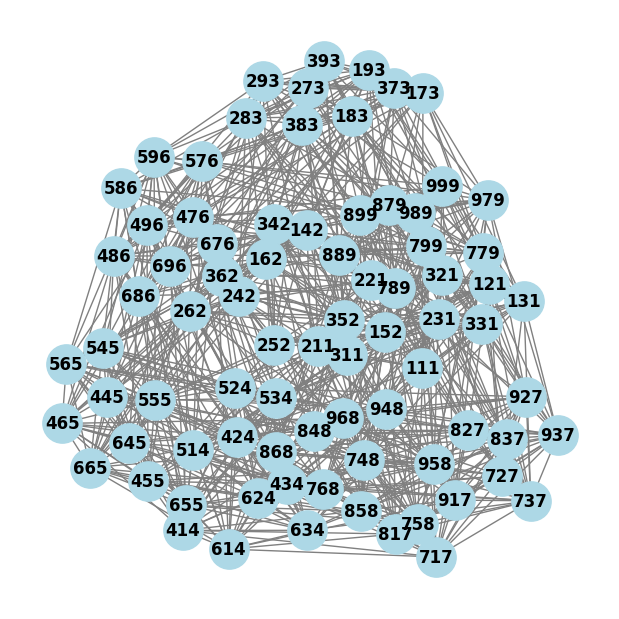

In [744]:
grafo = create_sudoku_grafo(9)
type(grafo)

pos = nx.spring_layout(grafo)

plt.figure(figsize=(6, 6))
nx.draw(grafo, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=12, edge_color='gray', font_weight='bold')

plt.show()

### Criação do dataframe

#### 1º Abordagem: criar um dataframe a partir do Sudoku em si

In [745]:
def create_sudoku_dataframe(N):
    data = []

    for line in range(1, N + 1): # For the lines
        for column in range(1, N + 1): # For de columns
            quadrant = (line - 1) // int(np.sqrt(N)) * int(np.sqrt(N)) + (column - 1) // int(np.sqrt(N)) + 1
                # Formula for calculating quadrants in Sudoku
            data.append([line, column, quadrant])

    columns = ['line_v', 'column_v', 'quadrant_v']

    data_frame = pd.DataFrame(data, columns = columns)

    return data_frame


- `pd.DataFrame(data, columns = columns)`: Recebe uma matriz onde cada linha possui três valores, juntamente com as colunas correspondentes especificadas em `columns`.

In [746]:
N = 9

if N % 3 == 0: # It will only accept sudoku sizes that are multiples of 3 to standardize the quadrants
    sudoku_df = create_sudoku_dataframe(N)
else:
    print("The size of N is not a multiple of 3.")

Estamos Trabalhando com sudo múltiplo de 3 nesse estágio inicial da pesquisa.

In [748]:
sudoku_df.shape

(81, 3)

Note que foi criado um Sudoku padrão 81x81, com 9 quadrantes.

In [749]:
sudoku_df.head(20)

,line_v,column_v,quadrant_v
0,1,1,1
1,1,2,1
2,1,3,1
3,1,4,2
4,1,5,2
5,1,6,2
6,1,7,3
7,1,8,3
8,1,9,3
9,2,1,1


#### Escalonando os valores

In [750]:
scaler = StandardScaler() 

scaler_sudoku_df = scaler.fit_transform(sudoku_df)

`StandardScaler()`: utilizado na fase de pré-processamento para a padronização de um DataFrame. Normalmente a fómula é: `z = (x - mean) / std`, onde z é o novo valor padronizado, x é o valor original, mean é a média e std é o desvio padrão. 

##### Aplicando K-Means

In [751]:
kmeans = KMeans(n_clusters=9, init='k-means++', random_state=0).fit(scaler_sudoku_df)

- `KMeans()`: Importamos a classe para usar o KMeans. Ao atribuir a uma variável, estamos instânciando.
- `fit(scaler_sudoku_df)`: Treinamos o modelo KMeans usando os dados padronizados no scaler_sudoku_df. Neste caso, o algoritmo tenta encontrar 9 clusters que melhor representem a estrutura dos dados. Os rótulos de cluster resultantes são armazenados em `kmeans.labels_`.

##### Aplicando Agrupamento Hierárquico

In [753]:
hierarquico = AgglomerativeClustering(n_clusters=9).fit(scaler_sudoku_df)

- `AgglomerativeClustering()`: Importamos a classe para usar o Agrupamento Hierárquico de dados. Ao atribuir a uma variável, estamos instânciando.
- `fit(scaler_sudoku_df)`: Treinamos o modelo usando os dados padronizados no `scaler_sudoku_df`. Neste caso, o algoritmo tenta dividir os dados em 9 clusters e armazenar em `hieraquico`.

#### Aplicando DBSCAN

In [794]:
dbscan = DBSCAN(eps=0.5, min_samples=2).fit(scaler_sudoku_df)

- `AgglomerativeClustering()`: Importamos a classe para usar o DBSCAN, um algoritmo de agrupamento baseado em densidade. Não especificamos a quantidade de clusters previamente, pois ele define clusters com base na vizinhança de um registro. Utiliza um raio para percorrer os registros e agrupá-los. Se não houver mais registros dentro do alcance do raio, indica o fim do cluster. 

- `eps`: Indica o tamanho do raio.
- `min_samples`: Indica quantos registros deve ter dentro do raio para continuar.


#### Resultados

In [795]:
sudoku_df['hierarquico'] = hierarquico.labels_

sudoku_df['k_means'] = kmeans.labels_

sudoku_df['dbscan'] = dbscan.labels_

In [796]:
sudoku_df[sudoku_df["k_means"] == 1]

,line_v,column_v,quadrant_v,hierarquico,k_means,dbscan
30,4,4,5,7,1,4
31,4,5,5,7,1,4
32,4,6,5,7,1,4
39,5,4,5,7,1,4
40,5,5,5,7,1,4
41,5,6,5,7,1,4
48,6,4,5,7,1,4
49,6,5,5,7,1,4
50,6,6,5,7,1,4


Note que independente do algoritmo aplicado, o clusters sempre são os quadrantes.

#### 2º Abordagem: criar o DataFrame a partir das arestas do grafo

In [803]:
# Obtendo as arestas do grafo
list_aresta = [(vertice, aresta) for vertice, aresta in grafo.edges]

# Criando um DataFrame a partir das arestas do grafo
df_aresta = pd.DataFrame(list_aresta, columns=['vertice', 'vertice_adj'])

In [760]:
df_aresta.head()

,vertice,vertice_adj
0,111,121
1,111,131
2,111,142
3,111,152
4,111,162


#### 3º Abordagem: criar o DataFame a partir da Matriz de Adjacência do grafo complementar (Teste).

In [761]:
grafo_complementar = nx.complement(grafo)

# Obtendo a matriz de adjacência como um array numpy
matriz_adj = nx.to_numpy_array(grafo_complementar)

# Criando uma Base de dados a partir de um grafo (neste caso, um grafo complementar)
df_matriz = pd.DataFrame(matriz_adj, columns=grafo_complementar.nodes, index=grafo_complementar.nodes)

In [763]:
df_matriz

,111,121,131,142,152,162,173,183,193,211,...,899,917,927,937,948,958,968,979,989,999
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
979,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
989,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [809]:
kmeans = KMeans(n_clusters=9, init='k-means++', random_state=0).fit(df_matriz.values)

# Adicionando o resultado o kmeans
df_matriz['kmeans'] = kmeans.labels_

In [810]:
df_matriz[df_matriz["kmeans"] == 8]

,111,121,131,142,152,162,173,183,193,211,...,927,937,948,958,968,979,989,999,cluster,kmeans
142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7,8
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,7,8
162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,7,8
242,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7,8
252,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,7,8
262,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,7,8
342,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7,8
352,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,7,8
362,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,7,8
